# "Исследование объявлений о продаже квартир" <a class="tocSkip">

## Цель исследования

<div style="border:solid black 3px; padding: 20px">

<b>Целью данного исследования является изучение и выявление параметров, влияющих на стоимость квартир в г. Санкт-Петербурге и соседних населённых пунктах. </b><br><br>
    
Для исследования мы имеем данные из сервиса  Яндекс.Недвижимость - архив объявлений о продаже квартир. Некоторые данные вписаны пользователями, некоторые - получены автоматически на основе картографических данных.<br><br>

В ходе исследования мы произведем все этапы предобработки данных, вычислим и добавим новые значения, необходимые нам для анализа, проанализируем характеристики квартир населенных пунктов г. Санкт-Петербурга, а так же квартир в центральном районе г. Санкт-Петербурга.<br><br>

В конце документа сформулируем общий вывод и дадим рекомендации.<br>
    
</div>

## Открытие данных
**Откроем файл с данными, ознакомимся с общей информацией, а так же визуально посмотрим на внутреннее заполнение таблицы.**

In [1]:
# помимо открытия файла импортируем нужные нам библиотеки для будущих манипуляций

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видно, что данные склеены и нет разделения по колонкам. В качестве разделителя в датафрейме используется знак `\t` - поэтому преобразуем наши данные, указав его в параметре `sep` и сразу выведем на экран первые 30 строк таблицы для ознакомления с содержимым таблицы.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Мы видим, что после первых 5 столбцов таблицы визуально заметно много пропусков. Далее подробнее изучим данные методом `info()` и `describe()`. Но, в начале переименуем столбцы таблицы, т.к. некоторые дефолтные названия столбцов не отражают сути своего содержания и будут неудобны в дальнейшем обращении с ними. Для переименования будем использовать метод `set_axis()`.

Исходные названия следующие:
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

Изменим названия некоторых из них на наиболее понятные в английском эквиваленте:
- airports_nearest —> *distance_to_airport*
- balcony —> *balconies_numbers*
- *ceiling_height* — без изменений
- cityCenters_nearest —> *distance_to_citycenter*
- days_exposition —> *adv_showing_days*
- first_day_exposition —> *publication_date*
- *floor* — без изменений
- *floors_total* — без изменений
- *is_apartment* — без изменений
- *kitchen_area* — без изменений
- *last_price* — без изменений
- *living_area* — без изменений 
- *locality_name* — без изменений
- open_plan —> *is_free_planning*
- parks_around3000 —> *parks_numbers_3km*
- parks_nearest —> *distance_to_park*
- ponds_around3000 —> *ponds_numbers_3km*
- ponds_nearest —> *distance_to_pond*
- rooms —> *rooms_numbers*
- studio —> *is_studio*
- total_area —> *total_flat_area*
- total_images —> *total_flat_images*


In [4]:
# переименовываем столбцы методом `rename()`
data = data.rename({'airports_nearest': 'distance_to_airport', \
'balcony': 'balconies_numbers', \
'cityCenters_nearest': 'distance_to_citycenter', \
'days_exposition': 'adv_showing_days', \
'first_day_exposition': 'publication_date', \
'open_plan': 'is_free_planning', \
'parks_around3000': 'parks_numbers_3km', \
'parks_nearest': 'distance_to_park', \
'ponds_around3000': 'ponds_numbers_3km', \
'ponds_nearest': 'distance_to_pond', \
'rooms': 'rooms_numbers', \
'studio': 'is_studio', \
'total_area': 'total_flat_area', \
'total_images': 'total_flat_images'}, axis = 'columns')

data.head() # проверяем визуально результат

,total_flat_images,last_price,total_flat_area,publication_date,rooms_numbers,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balconies_numbers,locality_name,distance_to_airport,distance_to_citycenter,parks_numbers_3km,distance_to_park,ponds_numbers_3km,distance_to_pond,adv_showing_days
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# ознакомимся теперь с типами данных каждого столбца и с их заполненностью

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_flat_images         23699 non-null int64
last_price                23699 non-null float64
total_flat_area           23699 non-null float64
publication_date          23699 non-null object
rooms_numbers             23699 non-null int64
ceiling_height            14504 non-null float64
floors_total              23613 non-null float64
living_area               21796 non-null float64
floor                     23699 non-null int64
is_apartment              2775 non-null object
is_studio                 23699 non-null bool
is_free_planning          23699 non-null bool
kitchen_area              21421 non-null float64
balconies_numbers         12180 non-null float64
locality_name             23650 non-null object
distance_to_airport       18157 non-null float64
distance_to_citycenter    18180 non-null float64
parks_numbers_3km         18181 non-null float64
distance_to_park         

In [6]:
# и для наглядности выведем в процентном соотношении число пропусков, используя 'coolwarm' градиент фона датафрейма

pd.DataFrame((data.isna().mean()*100).round(2)).style.background_gradient('coolwarm')

,0
total_flat_images,0
last_price,0
total_flat_area,0
publication_date,0
rooms_numbers,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


**Наши наблюдения про пропуски:**

**1)** Из информации выше видно, что есть много пропусков, разных по количеству, но при этом есть и столбцы, которые полностью заполнены (23699 наблюдений из 23699), это столбцы: 
- `total_flat_images`
- `last_price`
- `total_flat_area`
- `publication_date`
- `rooms_numbers`
- `floor`
- `is_studio`
- `is_free_planning`

Опираясь на эти столбцы можно будет с уверенностью брать эти данные как фундамент для подсчета других параметров.
Также можно предположить, что эта информация присутствует во всех объявлениях не просто так: она как минимум была обязательна на момент заведения объявления на сервисе Яндекс.Недвижимость.

**2)** Отсутствующие значения в столбцах `ceiling_height`, `living_area`, `kitchen_area` говорят о том, что скорее всего эти поля были не обязательными к заполнению и пользователи могли обойти их, решив, например, что общей площади будет достаточно в объявлении. Либо могли искренне не знать высоту потолков своей квартиры или площадь кухни. Было бы неплохо ввести и другие параметры как обязательные при заполнении объявления или иметь возможность подтягивать такие данные автоматически из других профильных баз данных. *Рекомендации техническим специалистам по обнаруженным проблемам в данных мы дадим в конце документа.* 
- Столбец `ceiling_height` заполним медианой по всем значениям, т.к. нам не известны типы домов или год их постройки, чтобы сделать заполнение точнее. 
- Чтобы заполнить пропуски в столбцах `living_area`, `kitchen_area` будет ориентироваться на имеющуюся у нас информацию по площадям квартир с заполненной информацией: мы найдем медианные соотношения кухни к общей площади и соотношения жилой площади к общей в зависимости от количества комнат в квартире, чтобы наиболее точно заполнить пропуски. И создав цикл мы заполним пропуски произведением найденного медианного соотношения на общую площадь квартиры в поривязке к количеству комнат, соответственно.

**3)** Отсутствующие значения в столбце `balconies_numbers` можно объяснить тем, что их 0, поэтому пользователи не стали указывать их. 
- Заполним далее их нулями.

**4)** Отсутствующих значений в `locality_name` всего 0.21%, для анализа этот столбец нам будет нужен, поэтому пустые 0.21% можем удалить.

**5)** Тоже самое со столбцом `floors_total` и его пропусками: заполнить каким-то средним или медианным значением мы не сможем. И поскольку эти значения нам будут нужны для исследования - пропуски в количестве 0.36% мы удалим.

**6)** Отсутствующие значения в столбце `adv_showing_days` говорят о том, что на момент сбора данных эти объявления были еще актуальны и квартиры не проданы, поэтому счетчик дней не сработал (предполагаем, что это автоматический счетчик из сервиса). Такие наблюдения с пропусками для нашего исследования не представляют интереса, поскольку нам нужно будет в ходе исследования опираться **на реальные данные с завершенной продажей.**
- А т.к. они не попадают в это определение мы можем их удалить (их всего 13.42 %, не критичный показатель). По нашему мнению будет неправильно их заполнять какими-либо значениями, т.к. это может сильно "исказить" финальные результаты.

**7)** Пропуски в столбце `is_apartment` нас не интересуют для будущего анализа, оставим без изменений. 
___

Как нам известно информация в столбцах `distance_to_airport`, `distance_to_citycenter`, `parks_numbers_3km`, `distance_to_park`, `ponds_numbers_3km`, `distance_to_pond` не заполнялась вручную и получена автоматически на основе картографических данных, поэтому можно утверждать, что *отсутствие информации говорит нам об отсутствии таких данных*, а именно об отсутствии в радиусе 3 км водоемов/парков, а расстояние до центра города Санкт-Петербурга не прогрузилось, например, из-за переадресации геосервиса на близлежащий город поселения (который вполне мог быть не распознан и не найден), а не на г. Санкт-Петербург. В любом случае пропуски по этим данным мы оставляем и не заполняем, т.к. они являются сугубо индивидуальными и не подлежащими заполнению по какому-либо признаку из тех данных, которые у нас есть.
___

Далее опишем какой тип данных из вышеуказанных нужно будет изменить:

- `last_price`: изменим 'float' на 'int', т.к. суммы за квартиры крупные, целочисленные значения нам больше подходят
- `publication_date`: переведем из 'object' в тип 'datetime', т.к. в данном столбце явно указана дата публикации объявления
- `floors_total`: переведем из 'float' в 'int' (количество этажей в доме не может быть не целым)
- `balconies_numbers`: переведем 'float' в 'int' (число балконов не может быть плавающим)

In [7]:
# посмотрим на числовое описание наших данных
data.describe()

,total_flat_images,last_price,total_flat_area,rooms_numbers,ceiling_height,floors_total,living_area,floor,kitchen_area,balconies_numbers,distance_to_airport,distance_to_citycenter,parks_numbers_3km,distance_to_park,ponds_numbers_3km,distance_to_pond,adv_showing_days
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Наши наблюдения про числовые описания данных:**
- min площадь квартиры = 12 м2. Похоже на ошибку ввода данных, проверим далее на выбросы.
- max число комнат = 19, похоже на ошибку ввода или крайне редкое явление.
- min значение 0 комнат может говорить о том, что это на самом деле - студия и 0 подставляется сервисом Яндекс.Недвижимости автоматически при таком типе квартиры. Данные 0 мы сможем заменить на 1.
- min высота потолка = 1, очень похоже на ошибку ввода. Даже в хрущевках минимальная высота потолка = 2,5 м. Далее проверим на выбросы. И max высота потолка = 100, похоже так же на ошибку ввода (или фейковое объявление).
- min площадь жилой площади = 1 м2. max площадь = 409 м2. Совершенно не похоже на правду.
- min площадь кухни = 1,3 м2. Так же совершенно не похоже на правду.
- min дистанция до аэропорта = 0, чисто технически не может быть это правдой, проверим сколько таких значений. 
- показатель `ad_showing_days` будем считать верным, т.к. это значение выгружено автоматически исходя из даты начала публикации.

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
    
- Ознакомились с предоставленной нам таблицей, оценили заполненность, числовое описание данных и тип данных каждого столбца.<br>
- Смогли заметить некоторые проблемы в загруженных данных, которые мы описали выше.<br>
- Далее нам необходимо будет скорректировать и исправить найденные ошибки.<br>
    
</div>

## Предобработка данных

### Обработка и замена пропусков

**Комментарии к коду в этой части документа будут максимально простыми и ясными без дублирования уже изложенных выше наблюдений о данных и их последующей обработке.**

In [8]:
# пропуски в `ceiling_height` заменим медианой

data.loc[data['ceiling_height'].isnull() == True, 'ceiling_height'] = data['ceiling_height'].median()
print('Количество пропусков столбца "ceiling_height" после замены медианой =', data['ceiling_height'].isnull().sum())

Количество пропусков столбца "ceiling_height" после замены медианой = 0


In [9]:
# заполним пропуски в столбце `balconies_numbers` нулями

data['balconies_numbers'] = data['balconies_numbers'].fillna(0)
print('Количество пропусков столбца "balconies_numbers" после замены "нулями" =', data['balconies_numbers'].isnull().sum())

Количество пропусков столбца "balconies_numbers" после замены "нулями" = 0


In [10]:
# удалим строки с отсутствующими данными по столбцам `floors_total`, `locality_name` и `adv_showing_days`

data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['adv_showing_days'])
print('Количество пропусков столбца "floors_total" после удаления значений NaN =', data['floors_total'].isnull().sum())
print('Количество пропусков столбца "locality_name" после удаления значений NaN =', data['locality_name'].isnull().sum())
print('Количество пропусков столбца "adv_showing_days" после удаления значений NaN  =', data['adv_showing_days'].isnull().sum())

Количество пропусков столбца "floors_total" после удаления значений NaN = 0
Количество пропусков столбца "locality_name" после удаления значений NaN = 0
Количество пропусков столбца "adv_showing_days" после удаления значений NaN  = 0


In [11]:
print('Количество пропусков столбца "living_area" до замены медианой =', data['living_area'].isnull().sum())
print('Количество пропусков столбца "kitchen_area" до замены медианой =', data['kitchen_area'].isnull().sum())

Количество пропусков столбца "living_area" до замены медианой = 1670
Количество пропусков столбца "kitchen_area" до замены медианой = 2023


Чтобы нам далее заполнить корректно пропуски в `kitchen_area` проверим один нюанс:
указывается ли в квартирах-cтудиях площадь кухни, т.к. обычно площадь кухни входит в жилую площадь студий и не указывается.

In [12]:
# проверим в скольких квартирах-cтудиях она указана
kitchen_area_studio = len(data.query('rooms_numbers == 0 & is_studio == True & kitchen_area.isnull() == False'))
print('Количество студий с указанной площадью кухни =', kitchen_area_studio)

# и в скольких не указана
no_kitchen_area_studio = len(data.query('rooms_numbers == 0 & is_studio == True & kitchen_area.isnull() == True'))
print('Количество студий без указания площади кухни =', no_kitchen_area_studio)

Количество студий с указанной площадью кухни = 0
Количество студий без указания площади кухни = 121


Как мы и предполагали нам не известно ни одно значение площади кухни для студий, мы не сможем определить медианный показатель `kitchen_area` для студий с 0 комнат, поэтому чтобы заполнить пропуски - мы заменим 0 комнат на 1 комнату. Считаем такую замену корректной как по логическому содержанию, так и по количественным значениям/соотношениям, которые найдет далее цикл заполнения пропусков для 1-комнатных квартир.

In [13]:
# заменим все строки с 0 комнат на 1 комнату

data['rooms_numbers'] = data['rooms_numbers'].replace(0, 1)

In [14]:
# создадим сам цикл заполнения пропусков в зависимости от кол-ва комнат квартиры, имеющей пропуски
# цикл будет перебирать уникальные значения столбца `rooms_numbers`

for i in data['rooms_numbers'].unique():
    
# создаем 2 переменные `ratio_living_median` и `ratio_kitchen_median`, куда будет записываться найденная медианная величина
# соотношения площадей в зависимости от кол-ва комнат

    ratio_living_median = data.loc[data['rooms_numbers']==i, 'living_area'].median() / \
    data.loc[data['rooms_numbers']==i, 'total_flat_area'].median()
    ratio_kitchen_median = data.loc[data['rooms_numbers']==i, 'kitchen_area'].median() / \
    data.loc[data['rooms_numbers']==i, 'total_flat_area'].median()
    
# заполняем места пропусков в `kitchen_area` и `living_area` произведением найденной медианного соотношения на общую площадь

    data.loc[(data['living_area'].isna() == True) & (data['rooms_numbers']==i), 'living_area'] = \
    data['total_flat_area'] * ratio_living_median
    data.loc[(data['kitchen_area'].isna() == True) & (data['rooms_numbers']==i), 'kitchen_area'] = \
    data['total_flat_area'] * ratio_kitchen_median

print('Количество пропусков столбца "living_area" после замены медианой =', data['living_area'].isnull().sum())
print('Количество пропусков столбца "kitchen_area" после замены медианой =', data['kitchen_area'].isnull().sum())

Количество пропусков столбца "living_area" после замены медианой = 0
Количество пропусков столбца "kitchen_area" после замены медианой = 0


In [15]:
# округлим значения столбцов до 2 знаков после запятой для удобства

data['kitchen_area'] = data['kitchen_area'].round(2)
data['living_area'] = data['living_area'].round(2)
     
# проверим наши данные на грубые дубликаты и оставшийся % пропусков

print('Количество найденных дубликатов =', data.duplicated().sum())
print()
print('Оставшийся % пропусков')
pd.DataFrame((data.isna().mean()*100).round(2)).style.background_gradient('coolwarm')

Количество найденных дубликатов = 0

Оставшийся % пропусков


,0
total_flat_images,0
last_price,0
total_flat_area,0
publication_date,0
rooms_numbers,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
is_apartment,87.82


### Изменение типов данных

**Выше в п.2 мы уже указывали какие типы данных нам нужно заменить и почему. Произведем непосредственно саму замену.**

In [16]:
# изменим 'float' на 'int' в столбцах `last_price`, `floors_total`, `balconies_numbers`

data.loc[:, ['last_price', 'floors_total', 'balconies_numbers']] = \
data.loc[:, ['last_price', 'floors_total', 'balconies_numbers']].astype('int')

# `publication_date`: переведем из 'object' в тип 'datetime'

data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
# отобразим случайные 5 строк для визуальной проверки

data.sample(5)

,total_flat_images,last_price,total_flat_area,publication_date,rooms_numbers,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balconies_numbers,locality_name,distance_to_airport,distance_to_citycenter,parks_numbers_3km,distance_to_park,ponds_numbers_3km,distance_to_pond,adv_showing_days
18070,15,5450000,79.1,2016-08-23,3,2.80,6,45.7,2,NaN,...,12.2,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,172.0
23121,20,4290000,35.2,2018-09-12,1,2.47,14,20.0,7,NaN,...,7.8,1,Санкт-Петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0
11317,15,4050000,40.4,2017-08-08,1,2.55,10,10.7,8,NaN,...,18.6,1,Санкт-Петербург,14017.0,15096.0,0.0,NaN,0.0,NaN,235.0
8201,4,2870000,32.8,2018-04-01,1,2.65,9,15.0,8,NaN,...,9.7,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,20.0
19293,20,10850000,86.5,2017-12-15,3,2.65,25,44.1,12,NaN,...,11.0,5,Санкт-Петербург,35257.0,14772.0,0.0,NaN,1.0,865.0,39.0


<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
    
- Произвели замену типов данных в столбцах `last_price`, `floors_total`, `balconies_numbers`, `publication_date`. <br>
    
Далее мы можем начать преобразовывать эти данные и находить новые значения.<br>
    
</div>

## Подсчет и добавление в таблицу новых значений

**Подсчитаем и добавим в таблицу новые столбцы со следующими значениями:**
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры (первый, последний, другой)
- соотношение жилой и общей площади
- соотношение площади кухни и общей площади

In [18]:
# создаем столбцы для параметров: цена квадратного метра, день, месяц и год публикации
# на выходе будут английские названия месяцев и дней недели, оставим их в таком формате

data['price_per_metr'] = (data['last_price'] / data['total_flat_area']).round(1) # и округлим до 1 знака после запятой
data['publication_weekday'] = data['publication_date'].dt.weekday_name
data['publication_month'] = data['publication_date'].dt.month_name()
data['publication_year'] = data['publication_date'].dt.year

# методом`loc`, применяя логическое условие, заполним столбец с наименованиями этажей в зависимости от уровня их расположенности

data.loc[data['floor'] == 1, 'floor_level'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_level'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'floor_level'] = 'другой'

# посчитаем соотношения площадей к общей площади и полученные соотношения округлим до 3 знаков после запятой для наглядности

data['ratio_living_to_total'] = (data['living_area'] / data['total_flat_area']).round(3)
data['ratio_kitchen_to_total'] = (data['kitchen_area'] / data['total_flat_area']).round(3)

# просмотрим случайные 5 строк с получившимся результатом
data.sample(5)

,total_flat_images,last_price,total_flat_area,publication_date,rooms_numbers,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_numbers_3km,distance_to_pond,adv_showing_days,price_per_metr,publication_weekday,publication_month,publication_year,floor_level,ratio_living_to_total,ratio_kitchen_to_total
2697,5,7000000,71.5,2018-11-24,3,2.60,10,43.1,4,NaN,...,1.0,293.0,14.0,97902.1,Saturday,November,2018,другой,0.603,0.115
2671,14,10800000,74.0,2017-04-30,2,2.65,6,44.1,2,NaN,...,3.0,338.0,37.0,145945.9,Sunday,April,2017,другой,0.596,0.207
8963,1,4150000,39.5,2016-01-10,1,2.65,18,18.0,10,False,...,1.0,855.0,204.0,105063.3,Sunday,January,2016,другой,0.456,0.278
4700,9,4100000,51.3,2017-06-16,2,2.55,5,30.6,3,NaN,...,0.0,NaN,15.0,79922.0,Friday,June,2017,другой,0.596,0.133
14104,7,3590000,36.0,2017-09-05,1,2.60,17,14.0,16,NaN,...,NaN,NaN,45.0,99722.2,Tuesday,September,2017,другой,0.389,0.306


<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы добавили в наш датафрейм 7 новых столбцов с новыми значениями:<br><br>
    
- `price_per_metr` (цена квадратного метра)<br>
- `publication_weekday` (день недели публикации объявления)<br>
- `publication_month` (месяц публикации объявления)<br>
- `publication_year` (год публикации объявления)<br>
- `floor_level` (этаж квартиры (первый, последний, другой)<br>
- `ratio_living_to_total` (соотношение жилой и общей площади)<br>
- `ratio_kitchen_to_total` (соотношение площади кухни и общей площади)<br>
    
</div>

## Исследовательский анализ данных

### Изучение характеристик квартиры: площадь, цена, число комнат, высота потолков

**Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы, диаграммы размаха для каждого из параметров. Определим границы редких и выбивающихся значения для последующего формирования очищенного среза данных.**

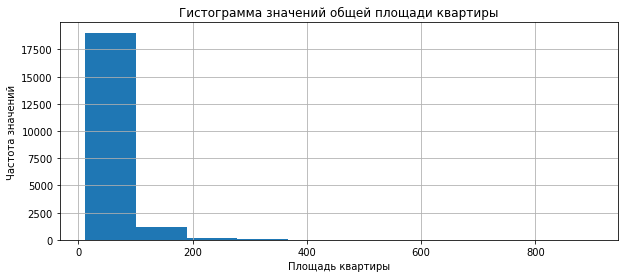

count    20394.000000
mean        58.834265
std         34.066200
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_flat_area, dtype: float64

In [19]:
# строим гистограмму для общей площади квартиры (а так же вызовем метод describe)

data['total_flat_area'].hist(figsize = (10,4))
plt.title('Гистограмма значений общей площади квартиры')
plt.ylabel('Частота значений')
plt.xlabel('Площадь квартиры')
plt.show()
data['total_flat_area'].describe()

Мы видим, что больше всего у нас квартир с размерами площадей, начинающимися от 12 кв.м.(отобразил метод describe) до 100 кв.м. Есть так же зона с квартирами от 100 до 180 кв.м., но таких меньше всего. И длинный хвост, практически слившийся с отметкой в 0 наблюдений, в размере 300 кв.м - 380 кв.м. и оканчивающийся на значении 900 кв.м. (вполне вероятно, что есть где-то такая квартира/апартаменты, но оно крайне выбивается из общей массы). Отсюда можно наблюдать и высокий параметр стандартного отклонения std.

Построим диаграмму размаха, ограничив максимальное значение ylim, например, на 180 кв.м.

(12, 180)

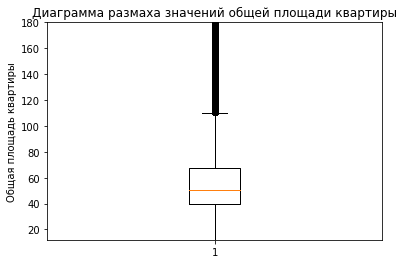

In [20]:
plt.boxplot(data['total_flat_area'])
plt.title('Диаграмма размаха значений общей площади квартиры')
plt.ylabel('Общая площадь квартиры')
plt.ylim(12, 180)

Верхний "ус" оканчивается на отметке в 110 кв.м. Будем считать это значение границей выбивающихся значений в столбце `total_flat_area`.

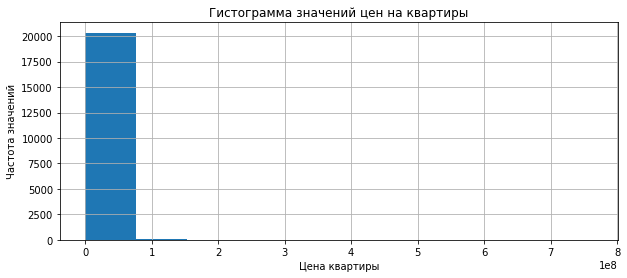

,last_price
count,20394.00
mean,6263721.90
std,10888576.97
min,12190.00
25%,3400000.00
50%,4500000.00
75%,6500000.00
max,763000000.00


In [21]:
# строим гистограмму для цены квартиры (также вызовем метод describe, преобразовав цены в более удобный формат)

data['last_price'].hist(figsize = (10,4))
plt.title('Гистограмма значений цен на квартиры')
plt.ylabel('Частота значений')
plt.xlabel('Цена квартиры')
plt.show()
data[['last_price']].describe().style.format('{:.2f}')

Мы видим, что ось `х` растянулась почти до 800 млн.руб. из-за наличия в списке max значения в 763 млн.руб, которое на гистограмме не видно и сливается с 0 отметкой. А больше всего у нас значений в районе ≈ до 7 млн.руб.

Построим диаграмму размаха, ограничив максимальное значение ylim (учитывая значение третьего квартиля), например, указав 12 000 000 р.

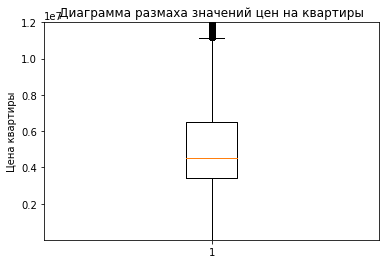

In [22]:
plt.boxplot(data['last_price'])
plt.ylim(12190, 12000000)
plt.ylabel('Цена квартиры')
plt.title('Диаграмма размаха значений цен на квартиры')
plt.show()

Хорошо видны в этом масштабе показатели оси `y`. Верхний "ус" оканчивается на отметке в 11 000 000 р. Будем считать это значение границей выбивающихся значений в столбце `total_flat_area`.
___

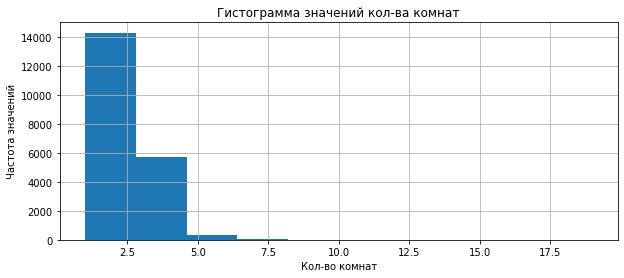

count    20394.000000
mean         2.033196
std          1.042295
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_numbers, dtype: float64

In [23]:
# строим гистограмму для количества комнат квартиры (также вызовем и метод describe)

data['rooms_numbers'].hist(figsize = (10,4))
plt.title('Гистограмма значений кол-ва комнат')
plt.ylabel('Частота значений')
plt.xlabel('Кол-во комнат')
plt.show()
data['rooms_numbers'].describe()

Видно, что больше всего в наших данных присутствуют 1-комнатные (включая студии, т.к. мы формально заменили 0 на 1 комнату), 2-комнатные. Чуть меньше 3-комнатных и 4-комнатных. Очень мало 5-комнатных. Выбиваются из общей картины значения в 6, 7 комнат - это крайне редкие значения. Max значение комнат в наших данных = 19, которое в нашем случае явно для нас является выбросом.

Построим диаграмму размаха, ограничив максимальное значение ylim в 10 комнат.

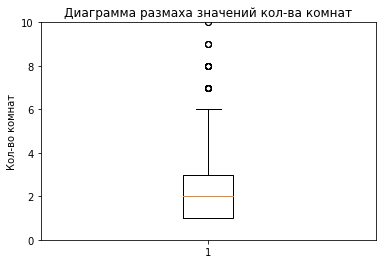

In [24]:
plt.boxplot(data['rooms_numbers'])
plt.ylim(0, 10)
plt.ylabel('Кол-во комнат')
plt.title('Диаграмма размаха значений кол-ва комнат')
plt.show()

Очетливо видно, что верхний "ус" находится на значении 6. Будем считать это значение границей выбивающихся значений в столбце `rooms_numbers`.

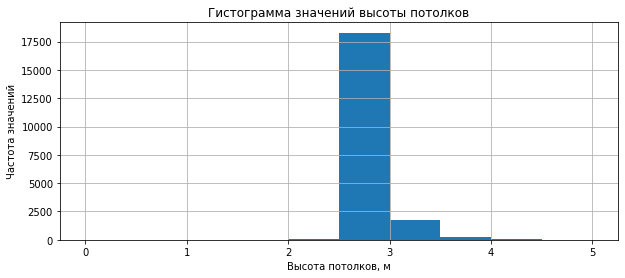

count    20394.000000
mean         2.715801
std          0.972956
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [25]:
# строим гистограмму для высоты потолков, ограничив максимальное значение предварительно до 5

data['ceiling_height'].hist(figsize = (10,4), range = (0, 5))
plt.title('Гистограмма значений высоты потолков')
plt.ylabel('Частота значений')
plt.xlabel('Высота потолков, м')
plt.show()
data['ceiling_height'].describe()

Видно, что большая часть квартир, представленных в наших данных, имеет потолок высотой от 2,5 м до 3 м. Крайне редки квартиры с потолками от 3 м до 3,5 м. И редкими значениями являются значения от 3,6 м и выше. Выбросом является значение в 100 м (которое не попало на график, но метод describe его отобразил).

Построим диаграмму размаха, ограничив ylim значениями 2.2 и 3, соответственно.

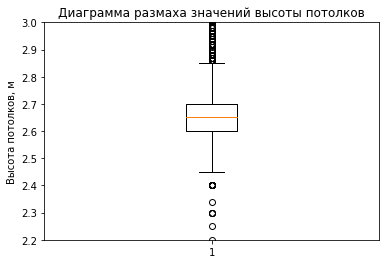

In [26]:
plt.boxplot(data['ceiling_height'])
plt.ylim(2.2, 3)
plt.ylabel('Высота потолков, м')
plt.title('Диаграмма размаха значений высоты потолков')
plt.show()

Ограничив значения ylim, мы хорошо видим на диаграмме границы самих выбросов: нижний "ус" находится в районе 2,43м и верхний "ус" 2,85м. Будем считать эти значения границами выбивающихся значений в столбце `ceiling_height`.

In [27]:
# cоздадим чистый датафрейм `clean_data`: поместим в него срез, в котором наши данные будут очищены от выбросов

clean_data = data.query('total_flat_area <= 110 & last_price <= 11000000 & rooms_numbers <= 6 & (2.43 <= ceiling_height <= 2.85)')

<div style="border:solid black 2px; padding: 20px">
В ходе изучения характеристик квартир (площадь, цена, число комнат, высота потолков) мы обнаружили границы выбивающихся значений и сформировали очищенный срез `clean_data` со следующими границами:

- значения столбца `total_flat_area` <= 110 кв.м. <br>
- значения столбца `last_price` <= 11 000 000 руб. <br>
- значения столбца `rooms_numbers` <= 6 комнат <br>
- значения столбца `ceiling_height` <= 2.85 м и одновременно >= 2.43 м <br>
</div>

### Изучение времени продажи квартиры

Если предположить, что имеющиеся у нас данные о кол-ве дней актуальности объявления `adv_showing_days`(с момента публикации объявления до момента его снятия) могут не полностью отражать действительный факт продажи квартиры (например, объявление могло быть снято не из-за продажи, а из-за решения собственника отложить продажу или из-за размещения объявления на другом ресурсе), то проверить данный факт мы могли бы, имея данные с причиной снятия объявления собственников в сам момент снятия объявления.

Но  т.к. проверить это мы не сможем - **будем считать, что `adv_showing_days` - это кол-во дней, за которое была продана квартира.**

Построим гистограмму, ограничив кол-во дней актуальности объявления 2 годами. 

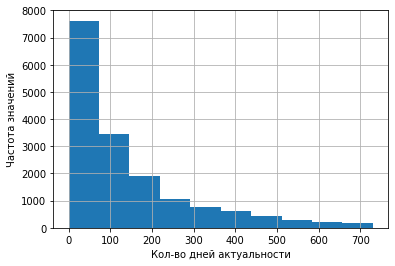

In [28]:
clean_data['adv_showing_days'].hist(range=(0, 365*2))
plt.ylabel('Частота значений')
plt.xlabel('Кол-во дней актуальности')
plt.title('')
plt.show()

По гистограмме видно, что большое число квартир продается менее, чем за 100 дней. Но посмотрим на медианные и средние значения.

In [29]:
print('Среднее количество дней для продажи квартиры =', clean_data['adv_showing_days'].mean().round(0))
print('Медианное количество дней для продажи квартиры =', clean_data['adv_showing_days'].median().round(0))

Среднее количество дней для продажи квартиры = 167.0
Медианное количество дней для продажи квартиры = 89.0


In [30]:
clean_data['adv_showing_days'].describe()

count    17055.000000
mean       167.181648
std        205.029391
min          1.000000
25%         43.000000
50%         89.000000
75%        211.000000
max       1580.000000
Name: adv_showing_days, dtype: float64

Среднее количество почти вдвое превышает медиану, похоже есть какие-то большие значения `adv_showing_days`. Посмотрим на график распределения `adv_showing_days` в зависимости от даты их публикации `publication_date`.

Text(0.5, 1.0, 'Распределение количества дней показа по дате размещения объявления')

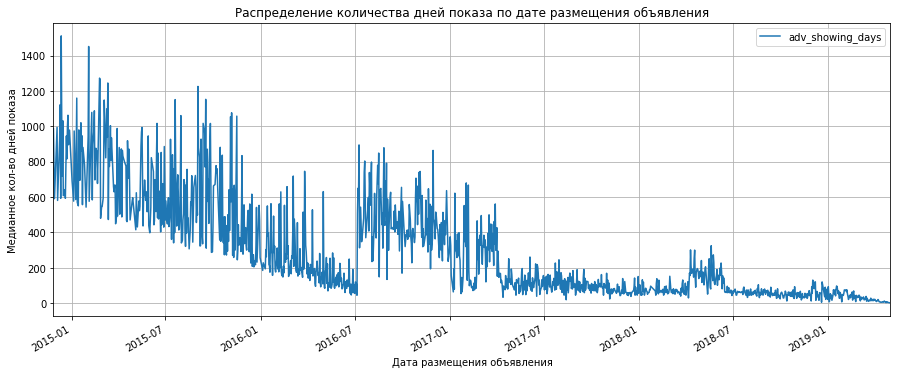

In [31]:
clean_data.groupby('publication_date').agg({'adv_showing_days':'median'}).plot(grid=True, figsize=(15, 6))
plt.xlabel('Дата размещения объявления')
plt.ylabel('Медианное кол-во дней показа')
plt.title('Распределение количества дней показа по дате размещения объявления')

Теперь наглядно видно и понятно, из-за чего средний показатель `adv_showing_days` оказался вдвое больше медианного. На графике видны большие показатели (от 400 до 1000 дней) `adv_showing_days` начиная с Января 2015 г. и до Июля 2016 г. (при этом с каждым годом уменьшалось кол-во `adv_showing_days`). Далее был недолгий всплеск и уже с Июля 2017 г. в среднем кол-во дней продажи резко упало и стабилизировалось и держалось до конца периода наблюдений на низком показателе.\

Значение Q1 = 43 дня  - мы можем считать как границу для определения очень быстрой продажи квартиры.
Для определения очень долгой продажи найдем границу верхнего "уса" `adv_showing_days`.

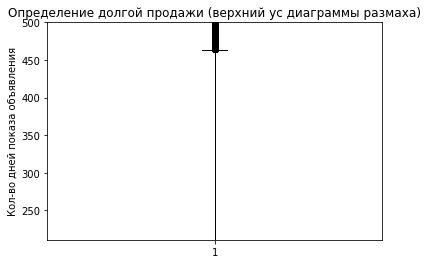

In [32]:
# построим диаграмму размаха 'adv_showing_days',указав для детализации для ylim значение Q3=211 и произвольное число дней 500
# таким образом мы детально рассмотрим значение, после которой начинаются выбросы

plt.boxplot(clean_data['adv_showing_days'])
plt.ylim(211, 500)
plt.ylabel('Кол-во дней показа объявления')
plt.title('Определение долгой продажи (верхний ус диаграммы размаха)')
plt.show()

<div style="border:solid black 2px; padding: 20px">
    
В ходе изучения времени продажи квартиры можно выделить следующие особенности:<br><br>
    
1) В среднем продажа квартиры занимает 3 месяца (89 дней).<br>
2) Если продажи прошли меньше, чем за полтора месяца (43 дня) - их можно считать крайне быстрыми.<br>
3) Если продажи прошли более, чем за 1 год и 2 месяца (460 дней) - их можно считать крайне долгими.<br>
    
</div>

### Изучение факторов, вляющих на стоимость квартиры

**Для определения влияния на стоимость квартиры таких характеристик как: площадь квартиры, число комнат, удаленность от центра - определим коэффициент корреляции между этими характеристиками и построим для наглядности матрицу рассеяния. Так же изучим зависимость цены от того, к какой категории этажа относится квартира (первый, последний, другой), и зависимость от даты размещения: дня недели, месяца и года.**

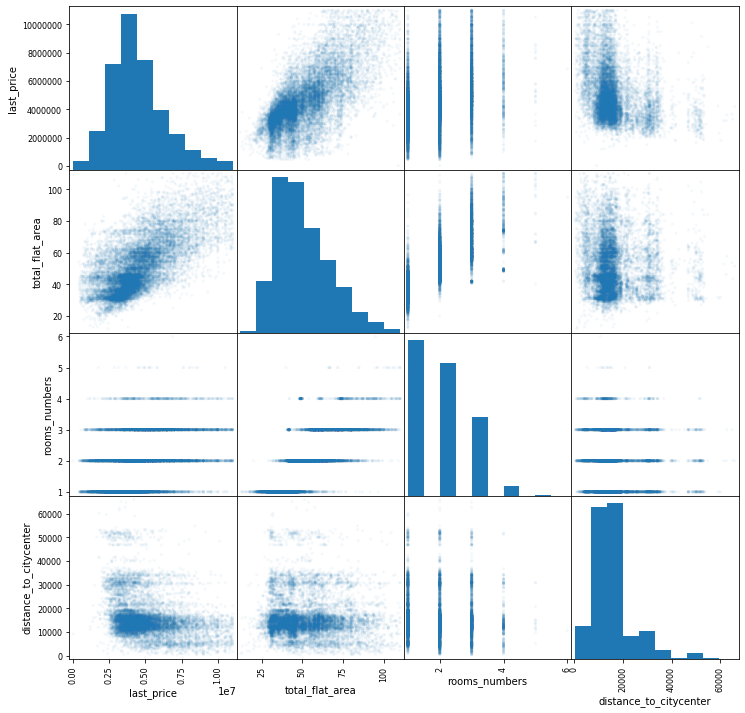

Коэффициент корреляции между ценой квартиры и её площадью = 0.68
Коэффициент корреляции между ценой квартиры и количеством комнат = 0.41
Коэффициент корреляции между ценой квартиры и расстоянием до центра = -0.31


In [33]:
# создадим переменную, в которую поместим столбцы 'last_price', 'total_flat_area', 'rooms_numbers', 'distance_to_citycenter'
# построим матрицу рассеяния и изучим распределение

factors_data = clean_data.loc[:, ['last_price', 'total_flat_area', 'rooms_numbers', 'distance_to_citycenter']]
pd.plotting.scatter_matrix(factors_data, alpha=0.05, figsize=(12, 12))
plt.show()

# выведем на экран найденные коэффициенты для каждой характеристики (округлив до 2 знаков после запятой)

print('Коэффициент корреляции между ценой квартиры и её площадью =', \
      (clean_data['last_price'].corr(clean_data['total_flat_area'])).round(2))
print('Коэффициент корреляции между ценой квартиры и количеством комнат =', \
      (clean_data['last_price'].corr(clean_data['rooms_numbers'])).round(2))
print('Коэффициент корреляции между ценой квартиры и расстоянием до центра =', \
      (clean_data['last_price'].corr(clean_data['distance_to_citycenter'])).round(2))

Сильнее всего прослеживается зависимость цены квартиры от её площади (коэфф.корреляции = 0,68), что вполне логично. С увеличением площади должна увеличиваться и цена. Зависимость от кол-ва комнат не сильно прослеживается, но видна верхняя граница цены для 1-комнатных квартир/студий, но эта зависимость больше уже похожа на зависимость от площади, которую мы и выявили.

In [34]:
# создадим функцию, которая будет строить график зависимости средней цены квартиры от ее 'аргумента'
# для детализации графика ограничим значение параметра ylim=(3000000, 5500000) рублей

def price_dependence(i):
    clean_data \
    .pivot_table(index =i, values = 'last_price') \
    .sort_values(by = 'last_price', ascending=False) \
    .plot(y='last_price', kind='bar', figsize=(14, 6), ylim=(3000000, 5500000), legend=True, grid=True)
    plt.xlabel(i)
    plt.ylabel('Средняя цена квартиры')
    plt.title('Зависимость цены квартиры')
    plt.tick_params(axis='x', labelrotation=25) # для удобства зададим поворот подписей оси 'x' на на 25 градусов
    plt.show()
    

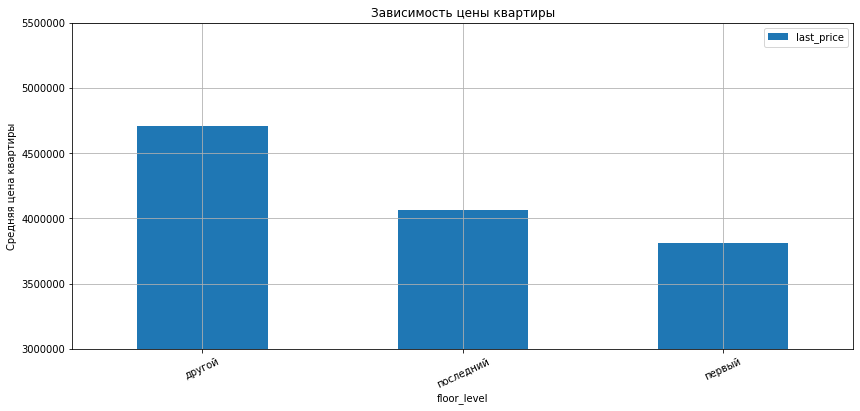

In [35]:
# построим график зависимости цены квартиры от расположения на этаже

price_dependence('floor_level')

Мы видим, что стоимость квартиры зависит от этажности: 
- цена квартир меньше всех остальных, если расположена на 1 этаже;
- чуть больше, чем на 1-ом этаже - стоимость квартиры на последнем этаже;
- самые дорогие квартиры расположены на других этажах дома;
- по графику видно, что стоимость квартир на 1-ом этаже в среднем примерно на 1 млн. дешевле, чем стоимость квартир на других этажах.

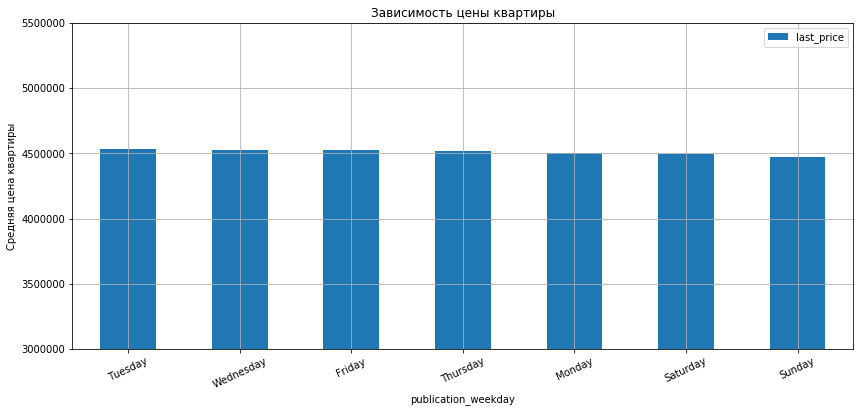

In [36]:
# построим график зависимости цены квартиры от дня публикации

price_dependence('publication_weekday') 

По графику видно, что только при публикации в воскресенье (Sunday) отслеживается небольшой спад средней цены в объявлениях. Но в целом зависимость цены квартиры от дня недели публикации объявления не выявлена.

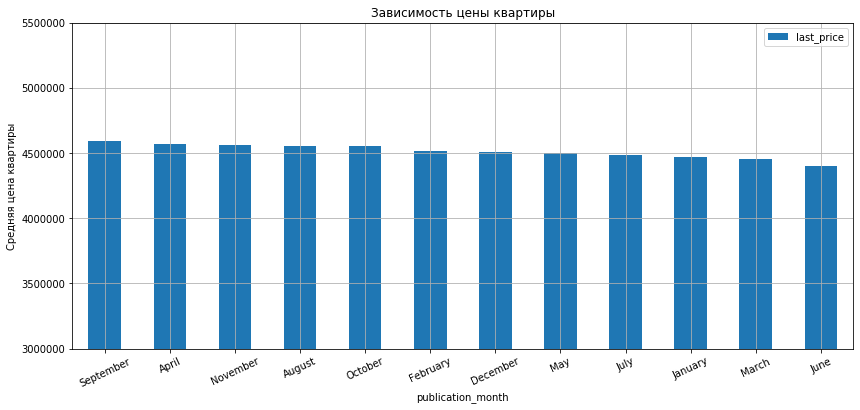

In [37]:
# построим график зависимости цены квартиры от месяца публикации

price_dependence('publication_month') 

Явной зависимости цены относительно месяца публикации объявления не наблюдается. 
Однако среди всех выделяются 2 месяца:
- Сентябрь (September) - месяц публикации с самыми высокими средними ценами квартир по сравнению с остальными месяцами (можно предположить, что это месяц, когда потенциальные покупатели возвращаются из отпусков и поэтому цена выше из-за спроса);
- Июнь (June) - месяц публикации с самыми низкими средними ценами квартир по сравнению с остальными месяцами (можно предположить, что это месяц, когда потенциальные покупатели, наоборот, уходят в летние отпуска, замедляется темп активности, поэтому цена ниже из-за малого спроса).

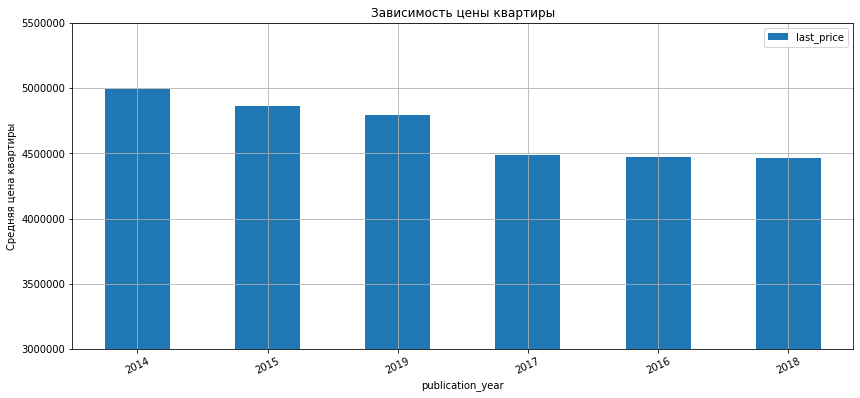

In [38]:
# построим график зависимости цены квартиры от года публикации

price_dependence('publication_year') 

Самые высокие показатели цен на квартиры были в 2014 году, затем наблюдается спад средней цены в 2015, 2016 и вплоть до 2018 года. И только в 2019 показатель цены значительно вырос. Здесь стоит отметить, что данный спад в 2014 году был связан с резким ослаблением российского рубля по отношению к иностранным валютам, после которого мы и наблюдаем снижение цен. Можно сказать, что цены квартир коррелируют с ситуацией на рынке и с курсом валют, которые в свою очередь меняются из года в год.

<div style="border:solid black 2px; padding: 20px">
    
В ходе изучения факторов, влияющих на стоимость квартиры можно выделить следующие особенности:<br><br>
    
1) Есть зависимость цены и площади квартиры: с увеличением площади квартиры увеличивается и ее стоимость.<br>
2) Есть зависимость цены от этажности: квартиры на 1-ом этаже дешевле всех. Квартиры, находящиеся не на 1 и не на последнем этаже - самые дорогие. <br>
3) Зависимость цены от удаленности квартир от центра не обнаружена. <br>
3) Зависимость цены от дня недели публикации не обнаружена. <br>
4) Зависимость цены от месяца публикации не обнаружена, но в Сентябре наблюдается рост средней цены, в Июне - наоборот, падение.<br>
5) Зависимость от года публикации не обнаружена, но есть зависимость от экономической ситуации и курса валют на рынке в каждый конкретный год.<br>
    
</div>

### ТОП-10 населенных пунктов с высокой и низкой стоимостью квартир

**Определим ТОП-10 населенных пунктов с наибольшим числом объявлений и выделим среди них населенные пункты с самой высокой и низкой стоимостью квартир.**

In [39]:
# применим метод сводной таблицы к нашим данным: 
# выведем на экран по каждому населенному пункту кол-во объявлений 'count' и среднюю цену за кв.м. 'price_per_metr (mean)'
# отсортируем итоговый результат по убыванию кол-ва объявлений и выведем первые 10 пунктов

top10_localities = clean_data.pivot_table(index='locality_name', values='price_per_metr', aggfunc=['count', 'mean'])
top10_localities.columns = ['count', 'price_per_metr (mean)']
top10_localities.sort_values(by='count', ascending=False).head(10)

,count,price_per_metr (mean)
locality_name,,
Санкт-Петербург,10615,103369.857937
посёлок Мурино,508,85724.263583
посёлок Шушары,400,77913.315000
Всеволожск,325,66856.366154
посёлок Парголово,301,89672.152159
деревня Кудрово,296,92489.242905
Колпино,289,74830.123183
Пушкин,256,99028.639844
Гатчина,249,67849.463454


<div style="border:solid black 2px; padding: 20px">
    
В ходе изучения населенных пунктов с наибольшим числом объявлений о продаже мы  определили следующее:<br><br>
    
1) г. Санкт-Петербург является самым "дорогим" по стоимости жилья городом и лидером по кол-ву объявлений о продаже. <br>
2) Вторым "дорогим" по стоимости жилья населенным пунктом является г.Пушкин, хотя объявлений о продаже в нем достаточно мало. <br>
3) Самым "дешевым" по стоимости жилья населенным пунктом является г.Выборг и кол-во объявлений о продаже в нем ниже всех из отобранной 10-ки.<br>
    
</div>

### Изучение влияния удаленности на цену. Выделение центрального района

**Определим центральную область квартир Санкт-Петербурга. Для этого построим график, отражающий как меняется цена с увеличением каждого км от центра: найдем точку километража на графике, где будет резкое изменение цены.**

In [40]:
import warnings
warnings.filterwarnings('ignore')

# создадим срез 'spb_data' с квартирами только Санкт-Петербурга и с указанным расстоянием (>=0)

spb_data = clean_data.query('locality_name == "Санкт-Петербург" & distance_to_citycenter >= 0')
spb_data['distance_to_citycenter_km'] = (spb_data['distance_to_citycenter'] / 1000).round(0).astype('int')

# найдем среднюю цену квартиры за каждый км

mean_price_per_km = (spb_data['price_per_metr'].mean() / spb_data['distance_to_citycenter_km'].mean()).astype('int')
print('За каждый Км от центра города цена квартиры в среднем увеличивается на', mean_price_per_km, 'рублей за кв.м.') 

За каждый Км от центра города цена квартиры в среднем увеличивается на 8020 рублей за кв.м.


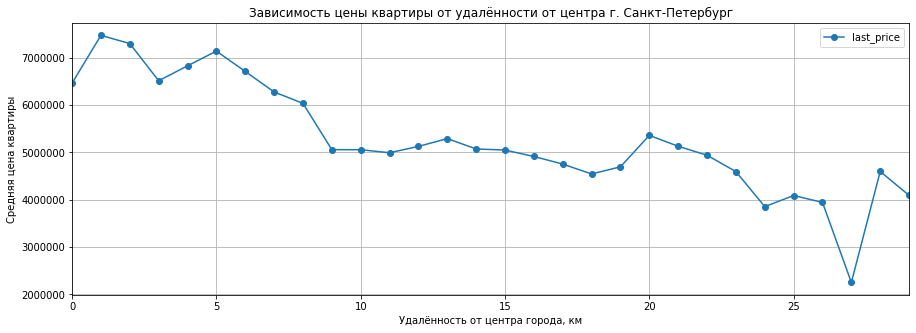

In [41]:
# построим график зависимости цены от удаленности от центра

spb_data \
.pivot_table(index ='distance_to_citycenter_km', values = 'last_price') \
.plot(y='last_price', style='o-', figsize=(15, 5), legend=True, grid=True)
plt.xlabel('Удалённость от центра города, км')
plt.ylabel('Средняя цена квартиры')
plt.title('Зависимость цены квартиры от удалённости от центра г. Санкт-Петербург')
plt.show()


По графику можно увидеть точку резкого спада цены (разница в 1 млн.) - это значение 8 км от центра. Выделим центральную зону города именно этим значением. 

А так же мы наблюдаем, что с увеличением удаленности от центра есть тенденция на уменьшение цены, но нельзя утверждать, что есть зависимость и расстояние от центра влияет на стоимость квартиры. Например, одну и ту же среднюю цену квартир можно встретить, если квартира находится на расстоянии как 10 км от центра, или 15 км от центра, так и 22 км.

<div style="border:solid black 2px; padding: 20px">
    
В ходе изучения зависимости средних цен квартир от их удаленности от центра мы определили радиус для центральной зоны г. Санкт-Петербурга: 8 км.

</div>

### Изучение квартир в центральном районе: факторы, влияющие на стоимость квартиры

**Изучим теперь для центральных квартир г. Санкт-Петербурга следующие параметры: площадь, цена, число комнат, высота потолков. 
А также изучим и определим факторы, влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления, а так же наличие природных объектов поблизости.**

In [42]:
# создадим срез `spb_center`, в котором будут только квартиры Спб, расположенные в радиусе не далее 8 км

spb_center = spb_data.query('distance_to_citycenter_km <= 8')

# создадим функцию `spb_center_flats_details()`, 
# которая для центральных квартир Спб будет строить гистограмму и выводить числовое описание данных в зависимости от `аргумента`

def spb_center_flats_details(i):
    print()
    print('Гистограмма "', i, '" для центральных квартир г. Санкт-Петербурга')
    spb_center[i].hist(figsize = (9,5))
    plt.ylabel('Частота значений')
    plt.xlabel(i)
    plt.show()
    print(spb_center[i].describe())

Построим далее гистрограммы по очереди, сразу описывая наблюдения.


Гистограмма " total_flat_area " для центральных квартир г. Санкт-Петербурга


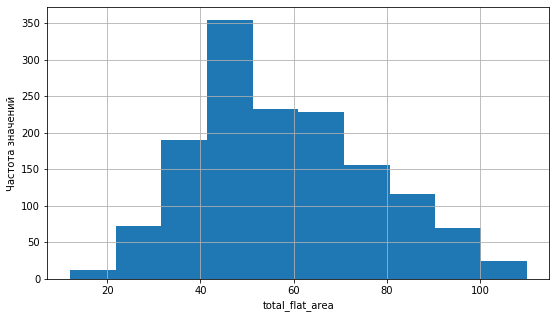

count    1456.000000
mean       58.040982
std        19.102722
min        12.000000
25%        43.375000
50%        56.000000
75%        71.000000
max       110.000000
Name: total_flat_area, dtype: float64


In [43]:
spb_center_flats_details('total_flat_area')

Гистограмма `total_flat_area` имеет нормальное распределение с немного выделяющейся вершиной на значении площади квартиры 45-50 кв.м.


Гистограмма " last_price " для центральных квартир г. Санкт-Петербурга


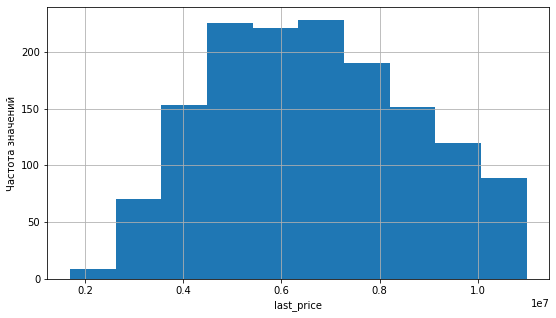

count    1.456000e+03
mean     6.660254e+06
std      2.070558e+06
min      1.686000e+06
25%      5.053750e+06
50%      6.500000e+06
75%      8.200000e+06
max      1.100000e+07
Name: last_price, dtype: float64


In [44]:
spb_center_flats_details('last_price')

Гистограмма `last_price` имеет нормальное распределение, среднее значение цены квартиры в центре г. Санкт-Петербурга составляет 6.5 млн.- 6.6 млн. рублей.


Гистограмма " rooms_numbers " для центральных квартир г. Санкт-Петербурга


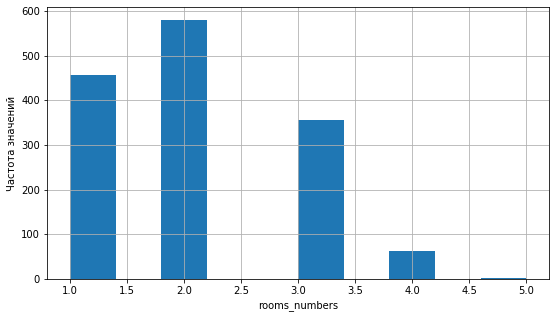

count    1456.000000
mean        2.019918
std         0.858522
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms_numbers, dtype: float64


In [45]:
spb_center_flats_details('rooms_numbers')

Гистограмма `rooms_numbers` имеет нормальное распределение. Больше всего в центральной районе Санкт-Петербурга в продаже были представлены 2-комнатные квартиры. На 2-м месте: 1-комнатные (или Студии).


Гистограмма " ceiling_height " для центральных квартир г. Санкт-Петербурга


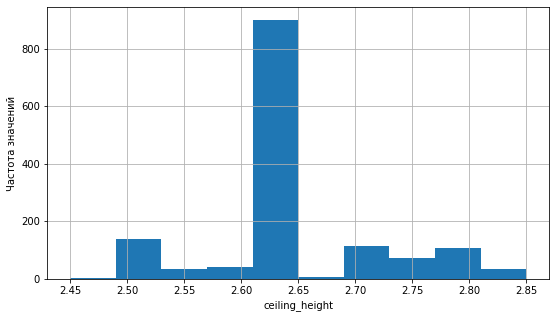

count    1456.000000
mean        2.656332
std         0.075668
min         2.450000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64


In [46]:
spb_center_flats_details('ceiling_height')

Гистограмма `ceiling_height` показывает преобладающее кол-во квартир с высотой потолков размера 2,63-2,65 м. Нормальное распределение отсутствует в связи с особенностью самой характеристики. Иные показатели высоты редки в квартирных домах Санкт-Петербурга.

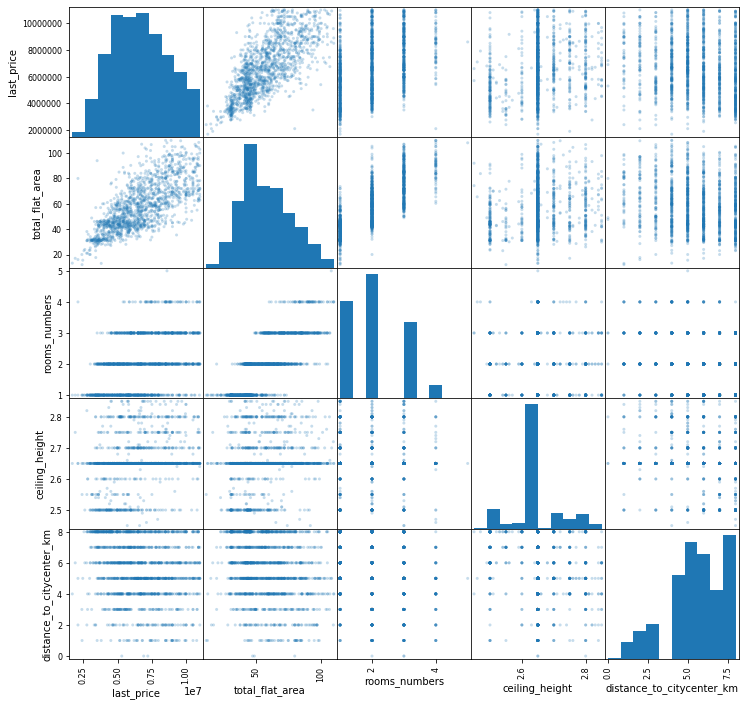

Коэффициент корреляции между ценой квартиры и её площадью = 0.72
Коэффициент корреляции между ценой квартиры и количеством комнат = 0.42
Коэффициент корреляции между ценой квартиры и высотой потолков = 0.23
Коэффициент корреляции между ценой квартиры и расстоянием до центра = -0.17


In [47]:
# создадим переменную, в которую поместим основные факторы, зависимость от которых нас интересует
# построим матрицу рассеяния и изучим распределение

spb_factors = spb_center.loc[:, ['last_price', 'total_flat_area', 'rooms_numbers', 'ceiling_height', 'distance_to_citycenter_km']]
pd.plotting.scatter_matrix(spb_factors, alpha=0.25, figsize=(12, 12))
plt.show()

# так же выведем на экран коэффициенты корреляции для каждого фактора

print('Коэффициент корреляции между ценой квартиры и её площадью =', \
      (spb_center['last_price'].corr(spb_center['total_flat_area'])).round(2))
print('Коэффициент корреляции между ценой квартиры и количеством комнат =', \
      (spb_center['last_price'].corr(spb_center['rooms_numbers'])).round(2))
print('Коэффициент корреляции между ценой квартиры и высотой потолков =', \
      (spb_center['last_price'].corr(spb_center['ceiling_height'])).round(2))
print('Коэффициент корреляции между ценой квартиры и расстоянием до центра =', \
      (spb_center['last_price'].corr(spb_center['distance_to_citycenter_km'])).round(2))

- В данном срезе наблюдается положительная корреляция между ценой квартиры и ее площадью, коэффициент высокий = 0.8. По сравнению с квартирами в округе города  (где коэфф.корр = 0.68) корреляция от площади квартир в центральном районе - сильнее выражена.
- Зависимость цены от количества комнат не ярко выражена (количество комнат больше коррелирует с площадью квартиры).
- Зависимость цены от высоты потолков отсутствует. 
- Зависимость цены от расстояния до центра отсутствует. 

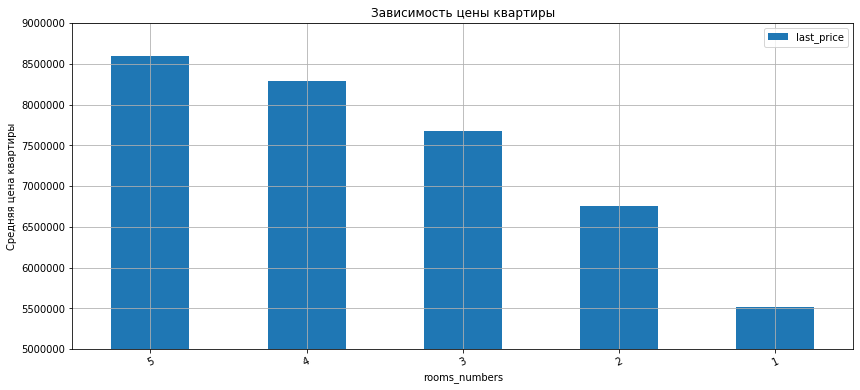

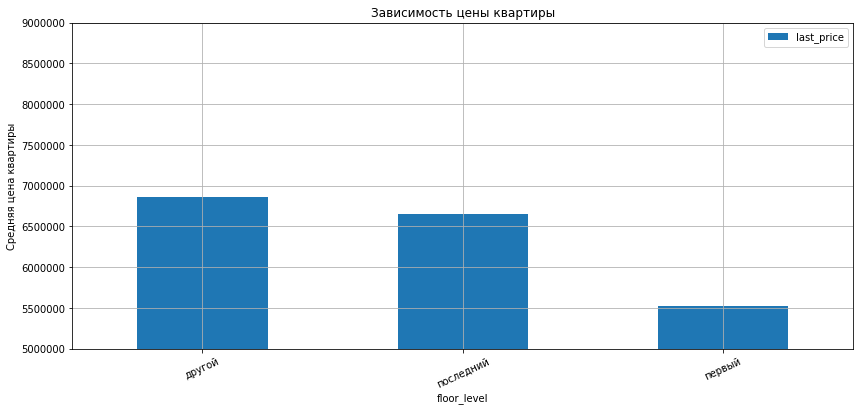

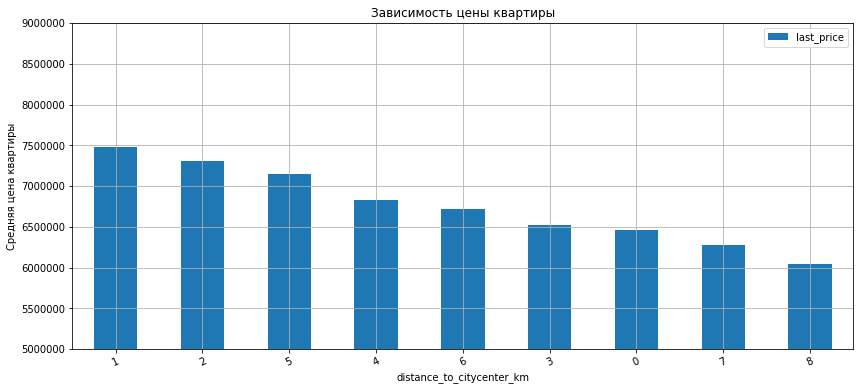

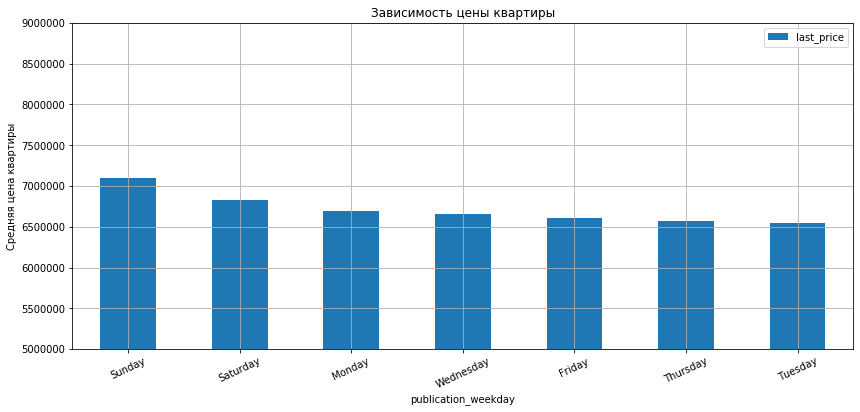

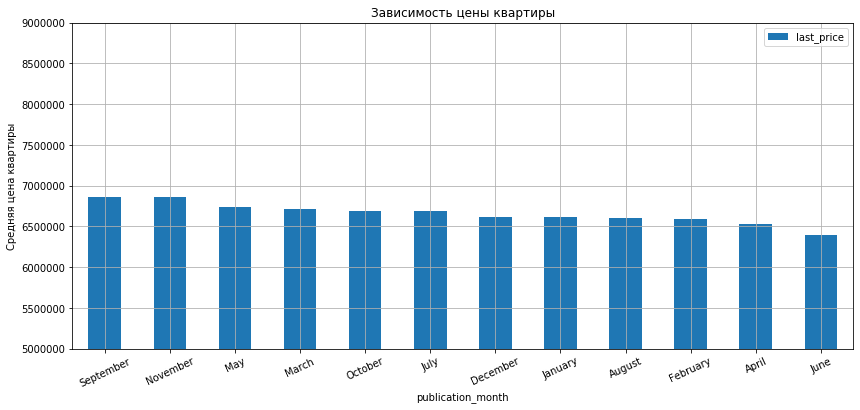

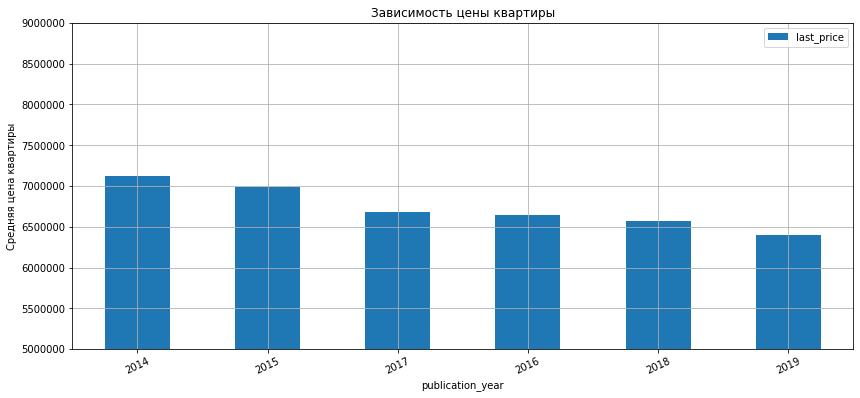

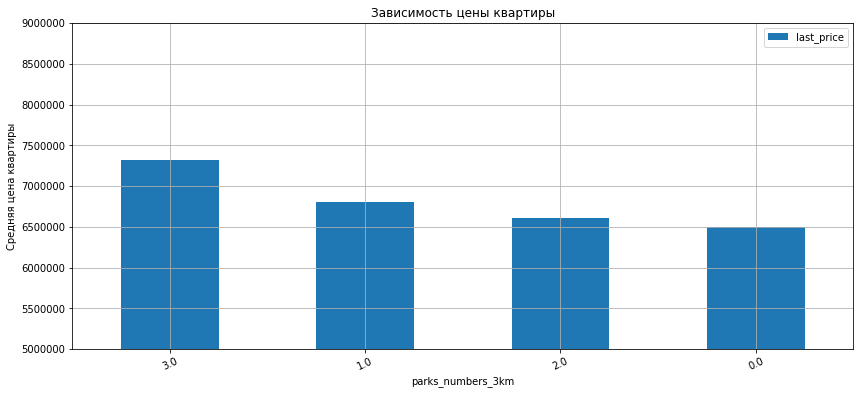

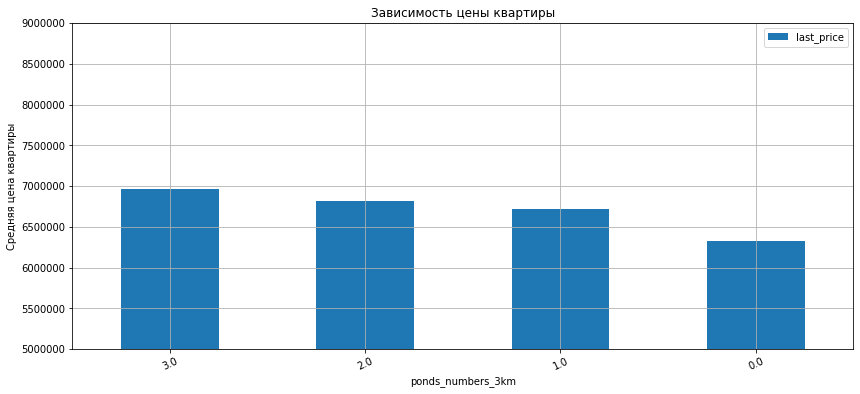

In [48]:
# с помощью цикла выведем на экран все графики зависимости цены от факторов, которые нас интересуют

for column in ['rooms_numbers', 'floor_level', 'distance_to_citycenter_km', \
                           'publication_weekday', 'publication_month', 'publication_year', \
                           'parks_numbers_3km', 'ponds_numbers_3km']:
    spb_center \
    .pivot_table(index = column, values = 'last_price') \
    .sort_values(by = 'last_price', ascending=False) \
    .plot(y='last_price', kind='bar', figsize=(14, 6), legend=True, grid=True, ylim=(5000000, 9000000))
    plt.xlabel(column)
    plt.ylabel('Средняя цена квартиры')
    plt.title('Зависимость цены квартиры')
    plt.tick_params(axis='x', labelrotation=25) # для удобства установим поворот подписей оси 'x' на 25 градусов
    plt.show()

***Опишем наблюдения на получившихся графиках.***

**Зависимость цены квартиры от количества комнат.**

График зависимости цены квартиры от кол-ва комнат показывает, что она есть, но все же (как мы выяснили ранее) - коэфициент корреляции составляет всего 0.42 и не сильно выражен; зависимость цены больше связана с увеличением площади квартиры (что может подразумевать как увеличение кол-ва комнат, так и, например, увеличение не жилой площади).

**Зависимость цены квартиры от расположения этажа.**

1) "Дешевле" всех остальных квартир  - квартиры на первом этаже в центре Санкт-Петербурга.

2) В отличии от выводов ранее (по всем близлежащим населенным пунктам Санкт-Петербурга), где квартиры на последнем этаже и первом  были значительно дешевле всех остальных, здесь - наблюдаем почти одинаковый уровень цен на квартиры на последнем этаже и на других этажах (кроме 1-го).

**Зависимость цены квартиры от удаленности от центра.**

Как мы ранее выяснили мы видим и на этом графике, что явной зависимости цены квартиры от ее удаленности от центра - нет, например: квартира в самом центре города (0 км) и в 3 км от центра в среднем стоят одинаково, при этом квартира в самом центре (0 км) может стоить дешевле квартиры в 5 км.

**Зависимость цены квартиры от даты публикации: дня недели, месяца, года.**

1) Выделяется день публикации воскресенье (Sunday), где замечена самая "большая" средняя цена квартир. 
В отличии от выводов ранее (по всем близлежащим населенным пунктам Санкт-Петербурга) - там, наоборот, воскресенье - день публикаций с самой "меньшей" средней ценой из всех дней недели. 
Показатели не сильно выделяются среди других и если учесть, что вторым по списку идет воскресенье (Saturday), то мы можем предположить, что это связано лишь с выходными днями у собственников квартир, когда они нашли свободное время опубликовать объявления. 
Зависимость от дня недели - не обнаружена.

2) Как и в выводах ранее мы наблюдаем тех же двух лидеров с самыми "высокими" средними ценами и с самыми "низкими" средними ценами - Сентябрь (September) и Июнь (June), соответственно. Явной зависимости цены относительно месяца публикации объявления не наблюдается. 

3) Ранее мы отмечали влияние экономической ситуации и случившийся кризис в 2014, при котором произошло резкое ослабление российского рубля по отношению к иностранным валютам и спад цен. 
Поэтому так же можно сказать, что цены квартир коррелируют с ситуацией на рынке и с курсом валют, которые в свою очередь меняются из года в год. Однако, в 2019 центральные квартиры Санкт-Петербурга не сильно выросли в цене по сравнению с данными по всей области Санкт-Петербурга.

**Зависимость цены квартиры от наличия в радицсе 3 км парков или прудов/водоемов.**

Как мы видим наличие хотя бы 1 парка в радиусе 3 км так же сказывается на цене квартиры в большую сторону по сравнению с квартирой без парков поблизости. Но зависимость от количества не обнаруживается, квартира с 2 парками поблизости может стоить дешевле, чем картира с 1 парком поблизости.

Как и в случае с парками наличие хотя бы уже 1 пруда/водоема в радиусе 3 км так же сказывается на цене квартиры в большую сторону по сравнению с квартирой без прудов/водоемов поблизости. С увеличением количества прудов/водоемов растет и цена.
В среднем цена квартиры уже при наличии 1 пруда/водоема поблизости увеличивает стоимость квартиры на 500 тыс.руб.

<div style="border:solid black 2px; padding: 20px">
    
В ходе изучения отобранных нами квартир в центральном районе г. Санкт-Петербурга, а так же факторов, влияющих на их стоимость, можно выделить следующие особенности:<br><br>
    
1) Средняя площадь квартиры составляет 45-50 кв.м. <br>
2) Средняя цена квартиры составляет 6,5 млн.- 6,6 млн. рублей. <br>
3) Средняя высота потолков квартиры составляет 2,63-2,65 м. <br>
4) Средняя квартира по кол-ву комнат - 2-комнатная. <br>
5) Самые "дешевые" квартиры располагаются на 1 этаже. <br>
6) Обнаружена сильная зависимость цены от площади: с увеличением площади увеличивается и цена квартиры. <br>
7) Обнаружена зависимость уровня цен на квартиры от экономической ситуации на рынке и курса валют. <br>
8) На стоимость квартиры влияет наличие природных объектов поблизости:  при наличии 1 пруда/водоема поблизости в среднем стоимость квартиры увеличивается на 500 тыс.руб.; а при наличии поблизости парков стоимость будет выше, чем квартира без парков поблизости.<br>
    
</div>

## Общий вывод

<div style="border: solid black 3px; padding: 20px">
    
<b>В результате проведенного исследования квартир в центральной части г. Санкт-Петербурга и соседних населенных пунктах были <br>определены следующие параметры, влияющие на рыночную стоимость квартир:</b><br><br>
    
1) Площадь квартиры (сильная положительная корреляция).<br>
2) Расположение на этаже (квартиры на 1-ом и на последнем этаже дешевле всех остальных).<br>
3) Экономическая ситуация на рынке в текущем году и курс валют оказывают влияние на изменение цен.<br><br>
    
<b>Были выявлены аномалии, при которых стоит учесть следующее:</b><br><br>
    
1) если продажи прошли меньше, чем за полтора месяца (43 дня) - их можно считать крайне быстрыми.<br>
2) если продажи прошли более, чем за 1 год и 2 месяца (460 дней) - их можно считать крайне долгими.<br><br>

<b>Выделены города-лидеры (из 10-ти отобранных по кол-ву объявлений) по уровню стоимости квартир:</b><br><br>
    
1) г. Санкт-Петербург - самый "дорогой" город по стоимости квартир.<br>
2) г. Пушкин - второй по дороговизне город (несмотря на маленькое количество размещенных объявлений).<br>
3) г. Выборг - самый "дешевый" город  по стоимости квартир.<br>
    
</div>

### Рекомендации для технических специалистов 

<div style="border:solid black 2px; padding: 20px">
    
<b>В ходе предобработки данных были выявлены некорректные значения и NaN значения, исходя из которых мы рекомендуем поставщикам данных Яндекс.Недвижимости, разработчикам Яндекс.Недвижимости обратить внимание на следующие моменты:</b><br><br>
    
1) Для избежания большого количества пропусков, рекомендуем при заполнении пользователями объявления установить обязательным к заполнению параметр `floors_total` (количество этажей).<br><br>
    
2) При наличии технической и правовой возможности рекомендуем обратить внимание на целесообразность автоматической подгрузки<br> значений столбцов `ceiling_height`, `living_area`, `kitchen_area` при вводе соответствующего адреса (наименование улицы, № дома) из <br>баз "Федеральной службы государственной регистрации, кадастра и картографии (Росреестр)".<br><br>
    
3) При отсутствии возможности, указанной выше в п.2. рекомендуем установить параметры `ceiling_height`, `living_area`, <br>`kitchen_area` как обязательные к заполнению.<br><br>
    
4) При снятии объявления с публикации рекомендуем выводить опрос со сбором ответов о причинах снятия объявления, без которого нельзя будет завершить процедуру снятия (примеры вариантов для указания в опросе: "квартира продана", "решил отложить продажу", "не удобен сервис", "другое").<br>
    
</div>